# Assignment 3

#### Adaptive Learning - not for handing in

In this assignment you will simulate the model of Assignment 2 under adaptive learning, and see whether the coefficients in the learning rule converge to the MSV solution.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# parameter specifications
sigma= 2
kappa=0.3
beta=0.99
phi1=1.5
phi2=0.2

1) Initialize the 2x3 array of coefficients that agents are learning (the 3 constants and the 3 coefficients on the shock in the MSV solution of output, inflation and the nominal interest rate). You can come up with the initial values yourself, but they should be different from the solution you found in Assignment 2.

2) Make a one dimensional array of 100000 random numbers drawn from a
normal distribution with zero mean. This will be the realizations of the
shock to output for 100000 periods

3) Make a loop of 100000 periods similar to the one from Assignment 1 where
you simulate the model. In each period inflation and output expectations
should follow from the values in your 2x3 array that agents have in that
particular period. 

In [31]:
A = np.array([[1, 0, 1/sigma], 
                [-kappa, 1, 0],
                [0, 0, 1]])
A_inv = np.linalg.inv(A)

def model(expY, expPi, shock_X):
    B = np.zeros(3)
    B[0] = expY+1/sigma*expPi+shock_X
    B[1] = beta * expPi
    B[2] = phi1*expPi+phi2*expY

    return np.dot(A_inv,B)

c = np.zeros((2,3))
c[0,0] = 1
c[1,0] = 1

N = 100000
shock_Y = np.random.randn(N)

Y = np.zeros(N)
Pi = np.zeros(N)
ni = np.zeros(N)
EY = np.zeros(N)
EPi = np.zeros(N)

R = np.ones((2,1))
v = np.ones((2,1))

for t in range(N):
    EY[t] = c[0,0]
    EPi[t] = c[1,0]

    # calculate with updated expectations
    #ni[t] = phi1*EPi[t] + phi2*EY[t]
    #Y[t] = EY[t] - 1/sigma*(ni[t]-EPi[t]) + shock_Y[t]
    #Pi[t] = beta*Pi[t]+kappa*Y[t]
    
    z = model(EY[t], EPi[t], shock_Y[t])
    Y[t] = z[0]
    Pi[t] = z[1]
    ni[t] = z[2]
    
    # update expectations
    #z = np.array([Y[t], Pi[t], ni[t]])

    v[1] = shock_Y[t]
    # gamma = 0.05
    R = R + 0.05 * (np.dot(v,np.transpose(v)) - R)
    c = c + 0.05 * np.dot(np.dot(np.linalg.inv(R),v),(z-np.dot(np.transpose(v), c)))

    if t %1000 == 0:
        print('time period:', t, '\n c:', c)



time period: 0 
 c: [[-1.01405862  8.245363    9.78257043]
 [ 3.01405862 -8.245363   -9.78257043]]
time period: 1000 
 c: [[-2.48791345e+00  2.43679796e-01  1.00277048e+00]
 [ 1.00013885e+00  3.00059740e-01  5.92722289e-05]]
time period: 2000 
 c: [[-2.49991352e+00  2.40026431e-01  1.00001998e+00]
 [ 1.00000111e+00  3.00000427e-01  3.94042421e-07]]
time period: 3000 
 c: [[-2.49999938e+00  2.40000184e-01  1.00000014e+00]
 [ 9.99999995e-01  3.00000000e-01  6.92869028e-10]]
time period: 4000 
 c: [[-2.50000000e+00  2.40000001e-01  1.00000000e+00]
 [ 1.00000000e+00  3.00000000e-01  2.51681618e-12]]
time period: 5000 
 c: [[-2.50000000e+00  2.40000000e-01  1.00000000e+00]
 [ 1.00000000e+00  3.00000000e-01  1.50664442e-13]]
time period: 6000 
 c: [[-2.50000000e+00  2.40000000e-01  1.00000000e+00]
 [ 1.00000000e+00  3.00000000e-01  7.88110203e-16]]
time period: 7000 
 c: [[-2.50000000e+00  2.40000000e-01  1.00000000e+00]
 [ 1.00000000e+00  3.00000000e-01  8.27593595e-17]]
time period: 8000 


4) Compare the final values of the ^c array, with the MSV solution you found
last week. Do agents learn the minimum state variable solution with this
learning algorithm?

5) Plot in one figure in different subplots: Output, Inflation, Nominal interest rate, expected output, expected inflation, shokc to output.

6) Explain what you see

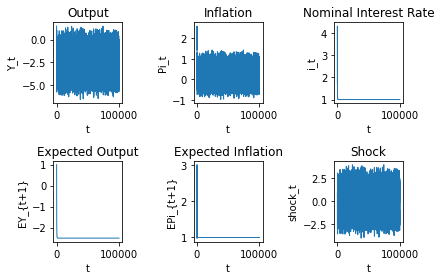

In [35]:
# The soultion is converging. C0 is close to 0 and C1 close to (1,0.3,0) which is what we found last week.

plt.figure()    #clear current figure

plt.subplot(2,3,1)
plt.plot(Y, linewidth=1)
plt.title('Output')
plt.ylabel('Y_t')
plt.xlabel('t')
# Lots of fluctuation. Looks like random noise

plt.subplot(2,3,2)
plt.plot(Pi, linewidth=1)
plt.title('Inflation')
plt.ylabel('Pi_t')
plt.xlabel('t')
# Similar to Output and Shock but around 3 times smaller which we can see here.

plt.subplot(2,3,3)
plt.plot(ni, linewidth=1)
plt.title('Nominal Interest Rate')
plt.ylabel('i_t')
plt.xlabel('t')
# Pretty large/small in the beginning but converge quickly after 500 periods.

plt.subplot(2,3,4)
plt.plot(EY, linewidth=1)
plt.title('Expected Output')
plt.ylabel('EY_{t+1}')
plt.xlabel('t')
# Pretty large/small in the beginning but converge quickly after 500 periods.

plt.subplot(2,3,5)
plt.plot(EPi, linewidth=1)
plt.title('Expected Inflation')
plt.ylabel('EPi_{t+1}')
plt.xlabel('t')
# Pretty large/small in the beginning but converge quickly after 500 periods.

plt.subplot(2,3,6)
plt.plot(shock_Y, linewidth=1)
plt.title('Shock')
plt.ylabel('shock_t')
plt.xlabel('t')
# Same as 1st plot: random noise

plt.tight_layout()

